# Практическое задание № 2. Нейронные сети


**Работу выполнил:**

Румянцев Алексей Александрович, 368731, ПИИ R22 бак 1.1 

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [69]:
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [70]:
path = Path().resolve()
train_data = pd.read_csv(os.path.join(path, 'train.csv'))
test_data = pd.read_csv(os.path.join(path, 'test.csv'))

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [71]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [73]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [74]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [75]:
missing_value_checker(test_edited)

[]
0


In [76]:
missing_value_checker(train_edited)

[]
0


In [77]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [78]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [79]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [80]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [81]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def get_seq_model(in_dim: int, out_dim: int, hid_dim: int = None,
                  hid_num: int = None, act: str = "relu", seed: int = 40):
    if in_dim <= 0:
        raise ValueError("Input dimension must be greater than 0.")
    if out_dim <= 0:
        raise ValueError('Output dimension must be greater than 0.')
    model = keras.Sequential()
    model.add(layers.Dense(in_dim, activation = act))
    if hid_dim is not None or hid_num is not None:
        if hid_dim is None or hid_dim <= 0:
            hid_dim = in_dim
        if hid_num is None or hid_num <= 0:
            hid_num = 1
        for _ in range(hid_num):
            model.add(layers.Dense(hid_dim, activation = act))
    model.add(layers.Dense(out_dim, activation = "linear"))

    tf.random.set_seed(seed)
    
    return model


in_sz = 150
out_sz = 1
simple_model = get_seq_model(in_dim=in_sz, out_dim=out_sz)

Скомпилируйте нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [83]:

simple_model.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [84]:
simple_history = simple_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 43.0630
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.0094
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5231
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0676
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6793
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7649
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1087
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6128
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2250
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9141
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6601
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4496
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2730
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1236
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9960
Epoch 16/20
37/3

**Оцените полученные результаты**

{'loss': [25.218103408813477, 11.744524955749512, 7.759925365447998, 5.630772113800049, 4.382925510406494, 3.543720006942749, 2.9342856407165527, 2.47033429145813, 2.1056411266326904, 1.8122297525405884, 1.5719650983810425, 1.3724777698516846, 1.2049968242645264, 1.063103199005127, 0.9419786930084229, 0.8379272818565369, 0.7480649352073669, 0.6701037883758545, 0.6022053360939026, 0.542875349521637]}


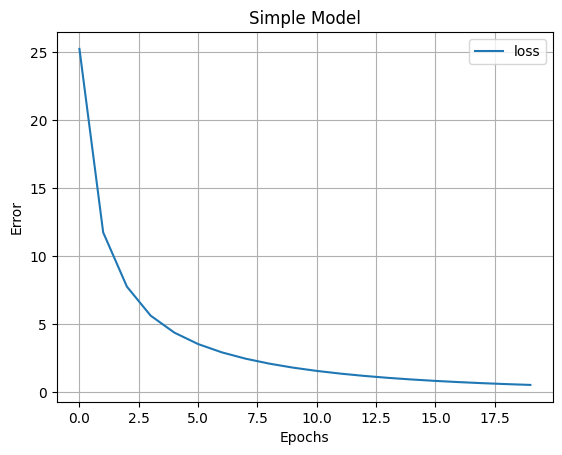

In [85]:
def show_loss(history, name: str = None):
    pd.DataFrame(history.history).plot()
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.title(name)
    plt.grid(True)


show_loss(simple_history, name='Simple Model')
print(simple_history.history)

In [86]:
simple_scores = simple_model.evaluate(X_val, y_val, verbose=1)
simple_scores

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.5344


0.535636305809021

### Прогнозирование

In [87]:
simple_preds = simple_model.predict(test_edited)
simple_preds

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[ 91474.38 ],
       [128283.125],
       [104212.3  ],
       ...,
       [129693.875],
       [ 91899.56 ],
       [ 99898.58 ]], dtype=float32)

In [88]:
def get_output(preds):
    output = pd.DataFrame(
    {
        'Id': test_data['Id'],
        'OverAllCond': test_data['OverallCond'],
        'SaleCondition': test_data['SaleCondition'],
        'SalePrice': np.squeeze(preds)
    })
    return output


simple_ans = get_output(simple_preds)
simple_ans

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,91474.382812
1,1462,6,Normal,128283.125000
2,1463,5,Normal,104212.296875
3,1464,6,Normal,92103.570312
4,1465,5,Normal,75059.437500
...,...,...,...,...
1454,2915,7,Normal,60157.718750
1455,2916,5,Abnorml,61362.597656
1456,2917,7,Abnorml,129693.875000
1457,2918,5,Normal,91899.562500


### Эксперименты

Будем эксперементировать со значениями различных параметров. Создание, компиляция, обучение модели, построение графика функции потерь и прогноз ищутся аналогично ранее проделанным шагам.

**Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.**

Сравним количество нейронов на входном слое: 150, 500, 1000.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 40.3349
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.4938
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9263
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5406
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2072
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3390
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7071
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2528
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9417
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7257
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5716
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4589
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3751
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3118
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2636
Epoch 16/20
37/3

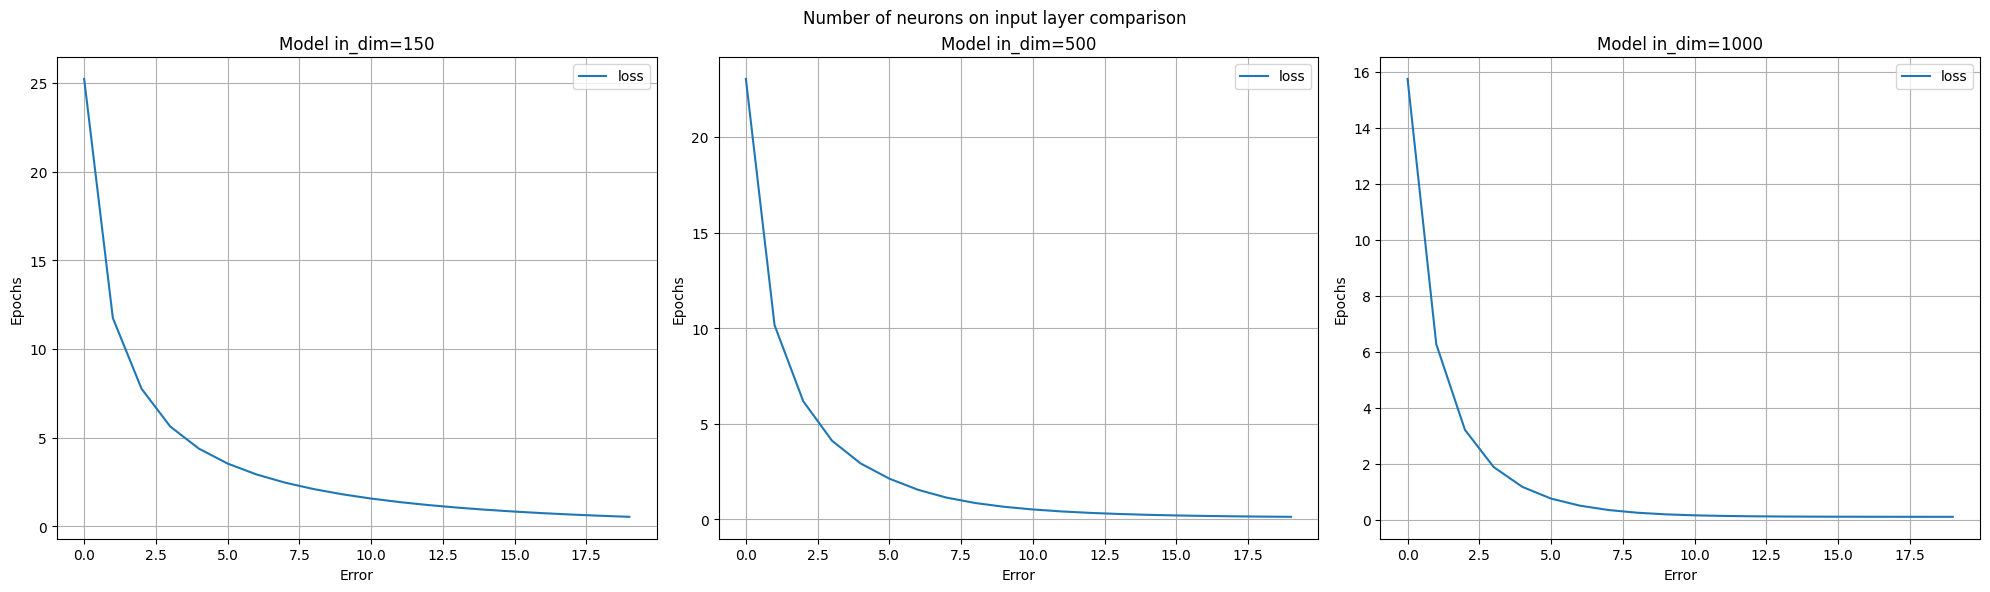

In [89]:
def show_loss3(history1, history2, history3, ttl, name1, name2, name3):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    pd.DataFrame(history1.history).plot(ax=axes[0])
    axes[0].set_title(f'{name1}')
    axes[0].set_xlabel('Error')
    axes[0].set_ylabel('Epochs')
    axes[0].grid(True)
    pd.DataFrame(history2.history).plot(ax=axes[1])
    axes[1].set_title(f'{name2}')
    axes[1].set_xlabel('Error')
    axes[1].set_ylabel('Epochs')
    axes[1].grid(True)
    pd.DataFrame(history3.history).plot(ax=axes[2])
    axes[2].set_title(f'{name3}')
    axes[2].set_xlabel('Error')
    axes[2].set_ylabel('Epochs')
    axes[2].grid(True)

    fig.suptitle(ttl)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) 


in_sz = 500 # Input layer dim (150->500)
out_sz = 1
model_in_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_in_500 = model_in_500.fit(X_train, y_train, epochs=20, batch_size=32)

scores_in_500 = model_in_500.evaluate(X_val, y_val, verbose=1)
preds_in_500 = model_in_500.predict(test_edited)

ans1 = get_output(preds_in_500)

in_sz = 1000 # Input layer dim (500->1000)
model_in_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_in_1000 = model_in_1000.fit(X_train, y_train, epochs=20, batch_size=32)

scores_in_1000 = model_in_1000.evaluate(X_val, y_val, verbose=1)
preds_in_1000 = model_in_1000.predict(test_edited)

ans2 = get_output(preds_in_1000)

name1, name2, name3 = 'Model in_dim=150', 'Model in_dim=500', 'Model in_dim=1000'
print(f'scores_in_150={simple_scores}\nscores_in_500={scores_in_500}\nscores_in_1000={scores_in_1000}')
print(simple_ans)
print(ans1)
print(ans2)
show_loss3(simple_history, history_in_500, history_in_1000, 'Number of neurons on input layer comparison', name1, name2, name3)

С увеличением нейронов на входном слое функция потерь быстрее убывает, то есть уменьшается ошибка.

**Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.**

Добавим один скрытый слой с разным количеством нейронов. Сравним: 150, 500, 1000.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 41.1492
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0571
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3354
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8857
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3424
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1635
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1159
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1069
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1048
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1035
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1024
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1013
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0989
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0974
Epoch 16/20
37/37

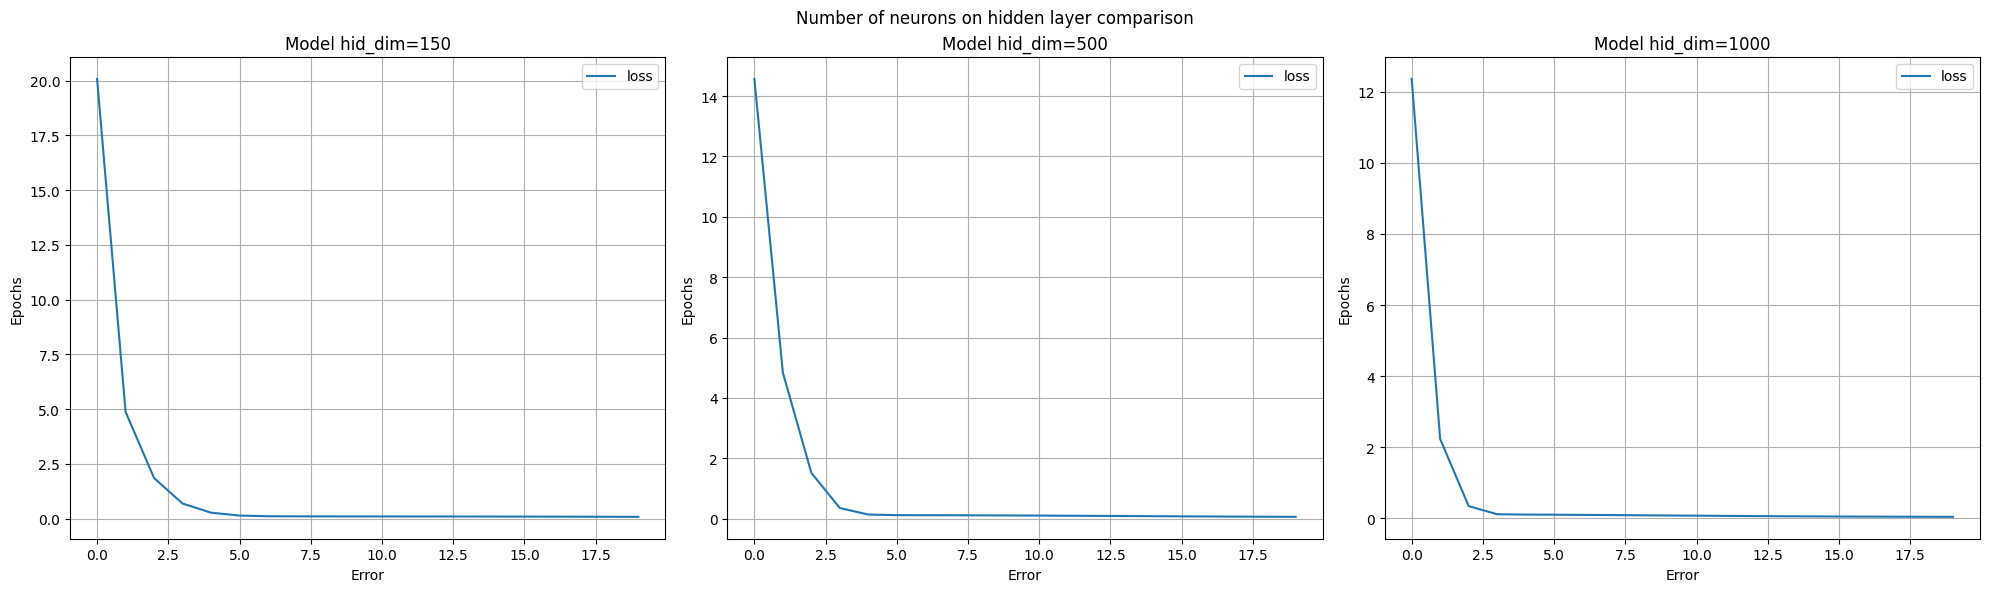

In [96]:
in_sz = 150
hid_sz = 150 # Hidden layer dim
out_sz = 1
model_hid_100 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_100 = model_hid_100.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100 = model_hid_100.evaluate(X_val, y_val, verbose=1)
preds_hid_100 = model_hid_100.predict(test_edited)
anshh1 = get_output(preds_hid_100)

hid_sz = 500 # Hidden layer dim (150->500)
model_hid_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_500 = model_hid_500.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_500 = model_hid_500.evaluate(X_val, y_val, verbose=1)
preds_hid_500 = model_hid_500.predict(test_edited)
ans2 = get_output(preds_hid_500)

hid_sz = 1000 # Hidden layer dim (500->1000)
model_hid_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_1000 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_1000 = model_hid_1000.evaluate(X_val, y_val, verbose=1)
preds_hid_1000 = model_hid_1000.predict(test_edited)
ans3 = get_output(preds_hid_1000)

name1, name2, name3 = 'Model hid_dim=150', 'Model hid_dim=500', 'Model hid_dim=1000'
print(f'scores_hid_150={scores_hid_100}\nscores_hid_500={scores_hid_500}\nscores_hid_1000={scores_hid_1000}')
print(anshh1)
print(ans2)
print(ans3)
show_loss3(history_hid_100, history_hid_500, history_hid_1000, 'Number of neurons on hidden layer comparison', name1, name2, name3)

При увеличении нейронов скрытых слоев функция потерь быстрее убывает, следовательно ошибка уменьшается.

**Используйте разное количество эпох. Опишите достигнутый результат.**

Сравним различное количество эпох: 10, 20, 50.

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0400
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0393
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0373
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0368
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0364
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0357
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0346
Epoch 6/50
37/37 ━━━━━━━

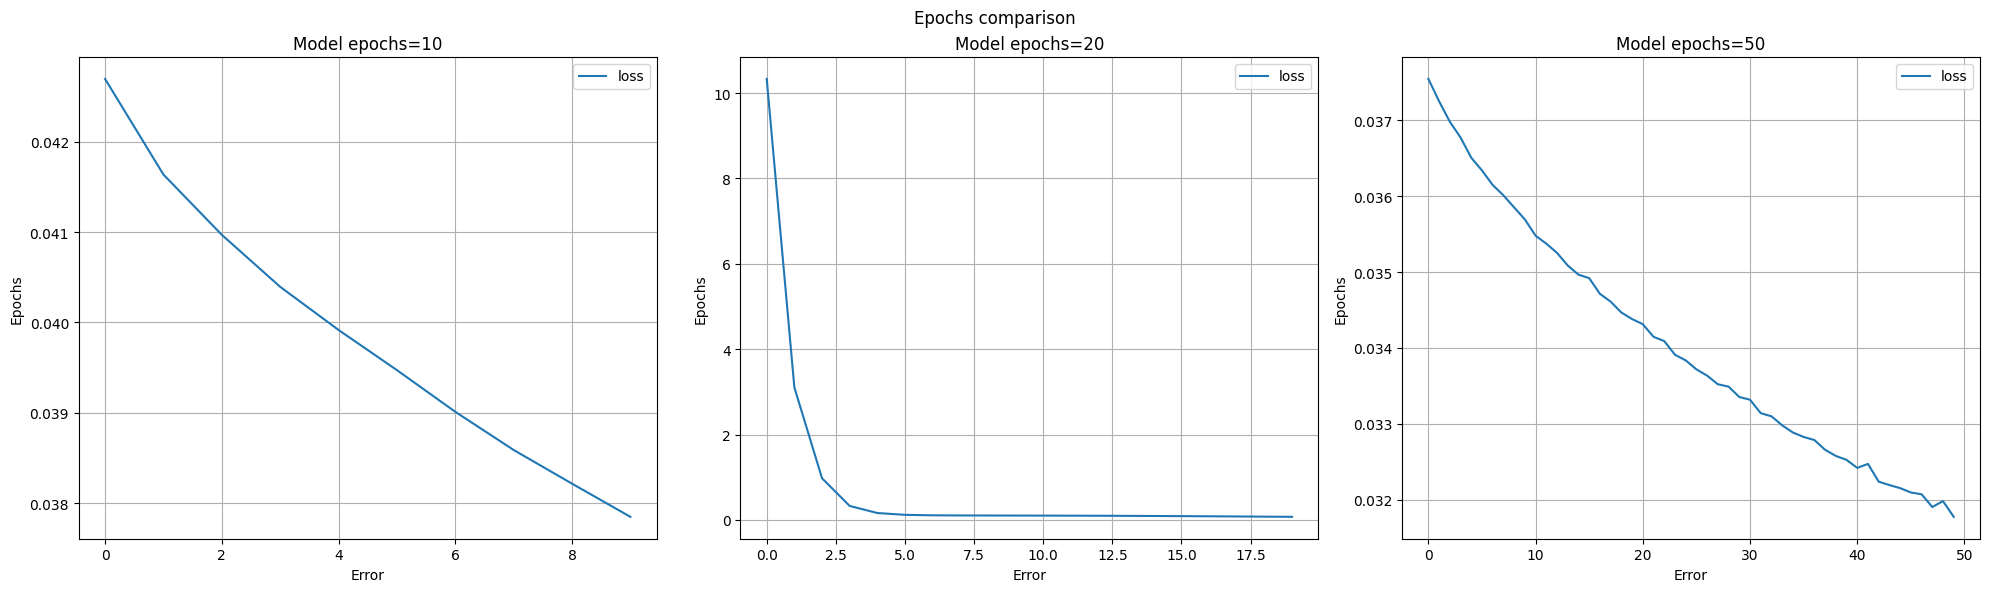

In [91]:
history_hid_100_2 = model_hid_1000.fit(X_train, y_train, epochs=10, batch_size=32)
history_hid_100_3 = model_hid_1000.fit(X_train, y_train, epochs=50, batch_size=32)
name1, name2, name3 = 'Model epochs=10', 'Model epochs=20', 'Model epochs=50'
show_loss3(history_hid_100_2, history_hid_100, history_hid_100_3, 'Epochs comparison', name1, name2, name3)

При маленьком количестве эпох потери уменьшаются только частично, график нерегулярный -- модель не успевала стабилизироваться -- недостаточное обучение. При большом количестве эпох модель подгоняется под шум и выбросы данных. Среднее значение дало наилучший результат.

**Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.**

Сравним различные размеры мини-выборок: 10, 32, 100.

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0305
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0301
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0298
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0295
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0294
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0293
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0292
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0290
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0289
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0288
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0287
Epoch 13/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0285
Epoch 14/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285
Epoch 15/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

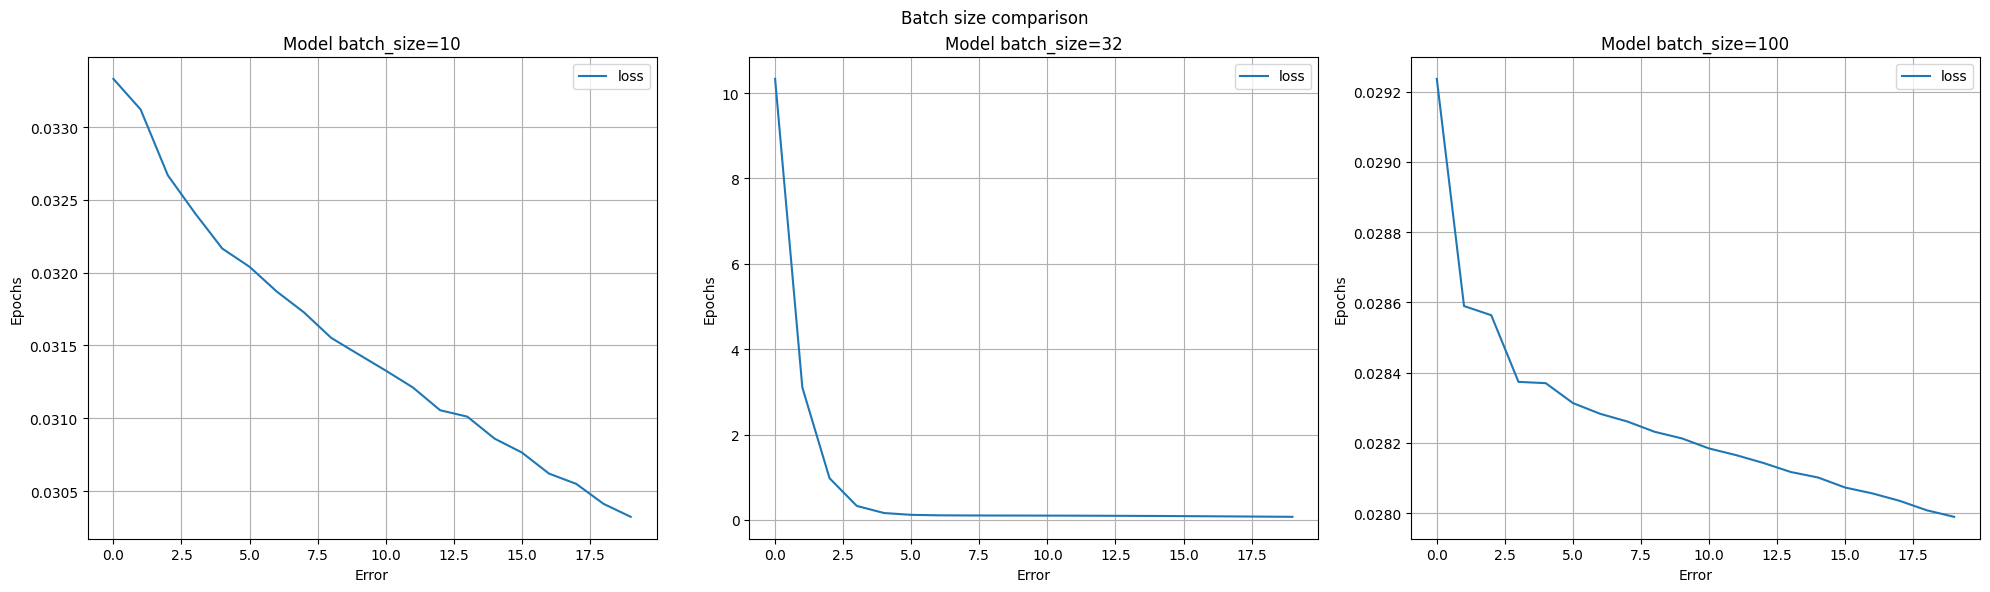

In [92]:
history_hid_100_4 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=10)
history_hid_100_5 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=100)
name1, name2, name3 = 'Model batch_size=10', 'Model batch_size=32', 'Model batch_size=100'
show_loss3(history_hid_100_4, history_hid_100, history_hid_100_5, 'Batch size comparison', name1, name2, name3)

При маленьком `batch_size` появляются флуктации в градиентах, так как они зависят от небольших случайных выборок. Весы часто обновляются, для хорошего результата нужно увеличить количество эпох. При среднем значении график нормальный. При больших значениях веса обновляются слишком редко, модель хуже адаптируется к локальным особенностям данных.

**Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.**

Сравним оптимизаторы `sgd`, `rmsprop` и `adam`.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 38.8084
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3140
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2673
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2475
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2391
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2349
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2319
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2290
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2261
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2234
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2208
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2182
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2156
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2132
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2108
Epoch 16/20
37/37

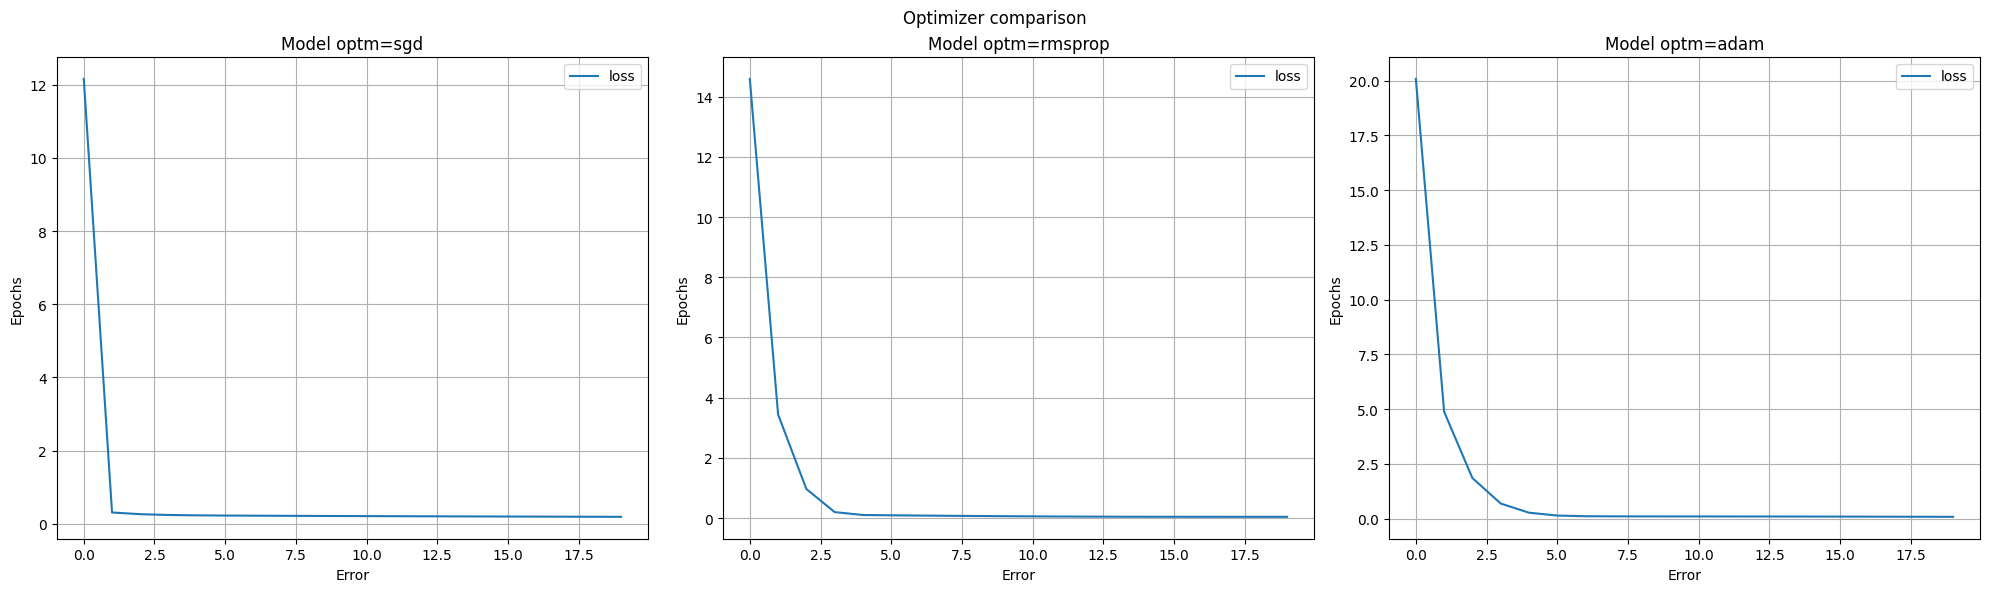

In [ ]:
in_sz = 150
hid_sz = 150
out_sz = 1
model_hid_150_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_150_new.compile(optimizer='sgd', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer

history_hid_100_new = model_hid_150_new.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new = model_hid_150_new.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new = model_hid_150_new.predict(test_edited)

ans1 = get_output(preds_hid_100_new)

model_hid_100_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new_2.compile(optimizer='rmsprop', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer

history_hid_100_new_2 = model_hid_100_new_2.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new_2 = model_hid_100_new_2.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new_2 = model_hid_100_new_2.predict(test_edited)

ans2 = get_output(preds_hid_100_new_2)

name1, name2, name3 = 'Model optm=sgd', 'Model optm=rmsprop', 'Model optm=adam'
print(f'scores_hid_150_new={scores_hid_100_new}\nscores_hid_150_new_2={scores_hid_100_new_2}\nscores_hid_150={scores_hid_100}')
print(ans1)
print(ans2)
print(anshh1)
show_loss3(history_hid_100_new, history_hid_100_new_2, history_hid_100, 'Optimizer comparison', name1, name2, name3)

Лучше всего получился результат с `rmsprop`, хуже всего с `sgd`, `adam` посередине.

Сравним функции потерь `MAE`, `Huber` и `MSLE`.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 171617.5312
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93298.7422
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49214.4922
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45983.5352
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42967.3320
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40224.1328
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37475.5508
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34783.3555
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32660.7832
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30833.5176
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29508.9590
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28402.0801
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27552.0781
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27093.7598
Epoch 15/20
37/37 ━━━━━━━━━

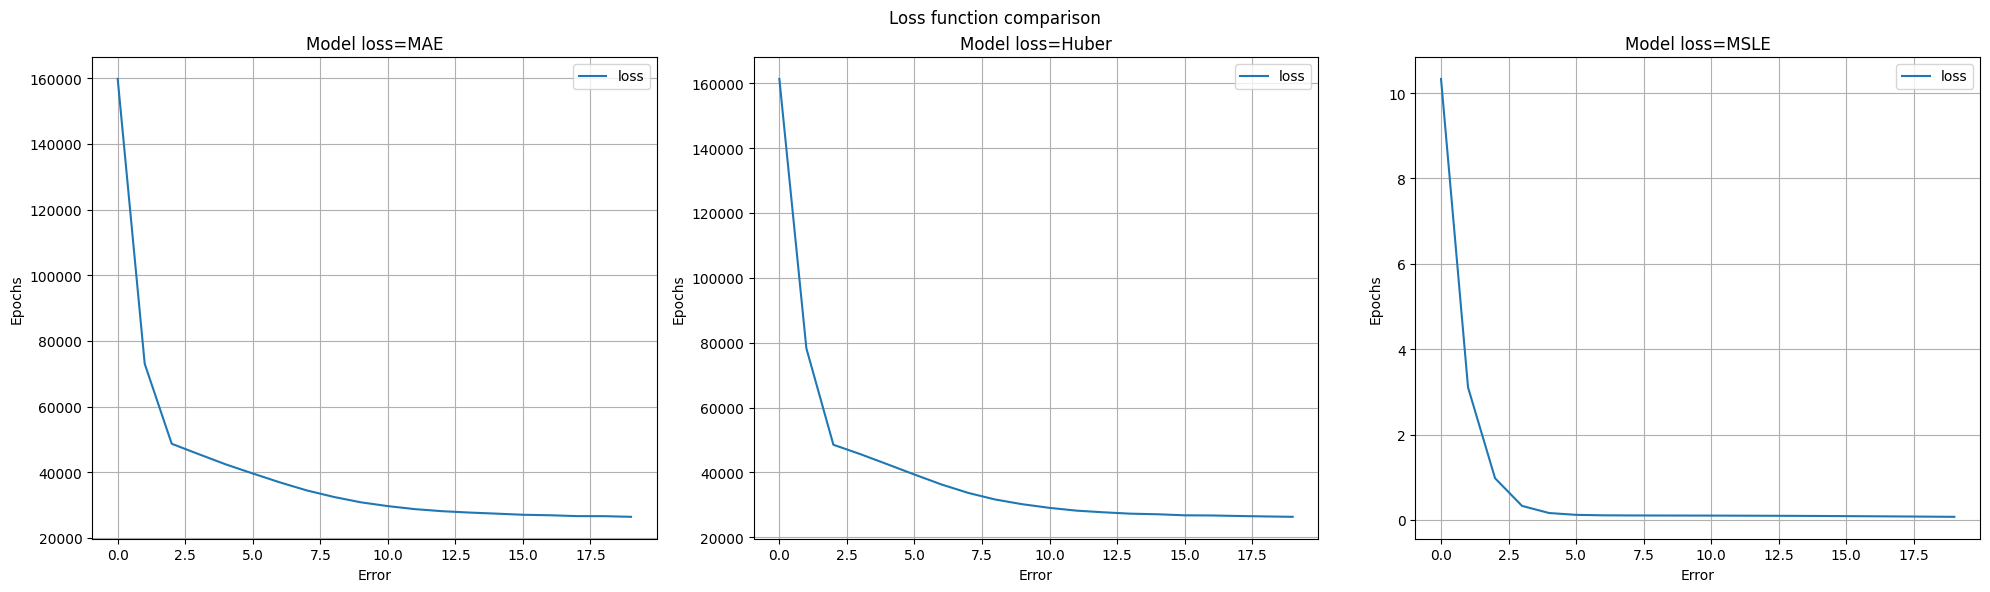

In [ ]:
in_sz = 150
hid_sz = 150
out_sz = 1
model_hid_150_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_150_new.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError())

history_hid_100_new = model_hid_150_new.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new = model_hid_150_new.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new = model_hid_150_new.predict(test_edited)

ans1 = get_output(preds_hid_100_new)

model_hid_100_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new_2.compile(optimizer='adam', loss=keras.losses.Huber()) 

history_hid_100_new_2 = model_hid_100_new_2.fit(X_train, y_train, epochs=20, batch_size=32)

scores_hid_100_new_2 = model_hid_100_new_2.evaluate(X_val, y_val, verbose=1)
preds_hid_100_new_2 = model_hid_100_new_2.predict(test_edited)

ans2 = get_output(preds_hid_100_new_2)

name1, name2, name3 = 'Model loss=MAE', 'Model loss=Huber', 'Model loss=MSLE'
print(f'scores_hid_100_new={scores_hid_100_new}\nscores_hid_100_new_2={scores_hid_100_new_2}')
print(ans1)
print(ans2)
show_loss3(history_hid_100_new, history_hid_100_new_2, history_hid_100, 'Loss function comparison', name1, name2, name3)

Результат с `MSLE` получился более "спокойный" вследствие логарифмирования. `Huber` (комбинация `MAE` и `MSE`) и `MAE` очень похожи друг на друга.

## Вопросы

**Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?**

Эпоха — это один полный проход по всему набору данных, используемых для обучения модели. Во время одной эпохи модель обучается на всех обучающих примерах. Если данные большие, то они могут быть разбиты на меньшие части, называемые батчами. Одна эпоха может состоять из нескольких итераций, если данные разбиты на батчи. Итерация — это один шаг процесса обучения, который соответствует обработке одного батча данных. В каждой итерации модель обновляет свои веса, используя информацию из текущего батча. Число итераций на одну эпоху зависит от размера данных и размера батча.

**Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?**

Функция активации — это математическая функция, которая используется в нейронных сетях для преобразования входного сигнала нейрона (взвешенной суммы входных данных) в выходной сигнал. Функция активации определяет, будет ли нейрон "активирован" (то есть, передаст ли он сигнал дальше в сети), или нет, основываясь на входных данных. Функции активации управляют потоком информации между нейронами. Они помогают решать, какую информацию нейрон должен передавать в следующий слой, а какую — отбросить. Таким образом, функции активации позволяют нейронной сети обучаться более сложным, нелинейным зависимостям в данных. Виды: сигмоида, гиперболический тангенс, ReLU.

**Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.**

MSE — это среднее значение квадратов ошибок предсказаний модели. Ошибка считается как разница между реальным значением и предсказанным значением. Квадрат ошибки усиливает влияние крупных отклонений (MSE чувствительным к выбросам). MSE часто используется в оптимизации моделей, таких как линейная регрессия или нейронные сети, так как оно является дифференцируемым и дает гладкую кривую потерь, что помогает эффективно обучать модели. MAE — это среднее значение абсолютных ошибок предсказаний модели. Ошибка в данном случае считается как разница между реальным и предсказанным значением, но без возведения в квадрат. MAE измеряет среднюю величину ошибок без учета их направления (положительное или отрицательное), и не усиливает влияние больших ошибок так, как это делает MSE (MAE более устойчив к выбросам). MAE используется в случаях, когда важно, чтобы ошибка предсказания была в одинаковой степени чувствительна ко всем отклонениям.